<a href="https://colab.research.google.com/github/lopeztanya033/Selecccion-de-Mejores-Clientes-/blob/main/Mejores_Clientes_%2C_Analisis_RFM_%3B_Rencey_Frecuency_Monetary_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análisis RFM:
Recencia, Frecuencia y Monetización como variables clave.
Segmentación de clientes en grupos homogéneos para comprensión detallada.

# FRM   Recency Frecuency Monetary
Los campeones son sus mejores clientes, los que compraron más recientemente, con mayor frecuencia y gastan
mucho. Recompense a estos clientes. Pueden convertirse en los primeros en adoptar nuevos productos y ayudarán
a promocionar su marca.

Los leales potenciales son sus clientes recientes con una frecuencia promedio y que gastaron una buena cantidad.
Ofrezca programas de membresía o fidelización o recomiende productos relacionados para aumentar sus ventas y
ayudarles a convertirse en sus leales o campeones.

Los nuevos clientes son sus clientes que tienen una puntuación RFM general alta pero que no son compradores
frecuentes. Comience a construir relaciones con estos clientes brindándoles soporte de incorporación y ofertas
especiales para aumentar sus visitas.

Los clientes en riesgo son sus clientes que compraron con frecuencia y gastaron grandes cantidades, pero que no
han comprado recientemente. Envíeles campañas de reactivación personalizadas para volver a conectarse y
ofrézcales renovaciones y productos útiles para fomentar otra compra.

No los puedo perder son clientes que solían visitar y comprar con bastante frecuencia, pero que no han visitado
recientemente. Tráelos de vuelta con promociones

# Nueva sección
Aplicar clusterización de FRM a data Online Retail
Taller 1: Aplicación de RFM *texto en cursiva*

FUENTE: Elaboración Interna Angel Catagua
Parejas?, Tres participantes? Solos?

15 minutos para preparar el taller

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Recency: Frescura (actualidad).
#Tiempo desde la ultima order del
#producto.

#Frequency: Frecuencia
#Número de transaciones o tiempo
#promedio entre transacciones.

#Monetary: Monto
#Promedio del valor de las
#transacciones

In [ ]:
#FRM: Recency Frecuency Monetary
#Ayudar a los especialistas en marketing a encontrar
#respuestas a las siguientes preguntas:

#¿Quiénes son tus mejores clientes?
#¿Cuál de sus clientes podría contribuir a su tasa de abandono?
#¿Quiénes tienen el potencial de convertirse en clientes valiosos?
#¿Cuáles de sus clientes pueden ser retenidos?
#¿Cuáles de sus clientes tienen más probabilidades de responder a las campañas de participación?

In [ ]:
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np

RFM 05042025

In [ ]:
df = pd.read_excel("/content/Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df['CustomerID'] = df['CustomerID'].astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  string        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4), string(1)
memory usage: 33.1+ MB


* "# de StockCode analizados
* "# de clientes analizados
* "# Distribiución facturas por mes, Fecha mini y Fecha Max de compra.-> Mateo
* "# Top 10 clientes que compran con mayor frecuencia . -> Mario & Steven
* "# Top 10 Sku comprados de acuerodo a la cantidad -> Roberto
* "# Top 5 Ciudades Compra de acuerdo al monto -> Tanya


In [ ]:
total_skus = df['StockCode'].nunique()
print(f"Total de SKUs diferentes: {total_skus:,}")

Total de SKUs diferentes: 4,070


In [ ]:
total_clientes = df['CustomerID'].nunique()
print(f"Total de Clientes diferentes: {total_clientes:,}")

Total de Clientes diferentes: 4,372


<Axes: >

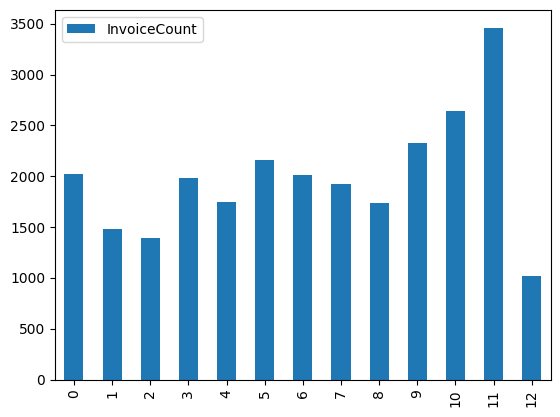

In [ ]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
# Agrupa por mes y cuenta los InvoiceNo únicos
invoice_count_per_month = df.groupby('InvoiceMonth')['InvoiceNo'].nunique().reset_index()
invoice_count_per_month.columns = ['InvoiceMonth', 'InvoiceCount']
invoice_count_per_month.plot(kind= 'bar')

In [ ]:
df.groupby('CustomerID')

In [ ]:
top_10_clientes = df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)
top_10_clientes.head(10)

,InvoiceNo
CustomerID,
14911.0,248
12748.0,224
17841.0,169
14606.0,128
15311.0,118
13089.0,118
12971.0,89
14527.0,86
13408.0,81


In [ ]:
ventas_sku = df.groupby('StockCode', as_index=False)['Quantity'].sum()
## Ordenar de mayor a menor
ventas_sku = ventas_sku.sort_values(by = 'Quantity', ascending=False)
## Top 10
Top10_sku = ventas_sku.head(10)
print(Top10_sku)

     StockCode  Quantity
1070     22197     56450
2622     84077     53847
3659    85099B     47363
3670    85123A     38830
2735     84879     36221
377      21212     36039
1905     23084     30646
1335     22492     26437
1453     22616     26315
889      21977     24753


In [ ]:
df['TotalPrice'] = df['Quantity']*df['UnitPrice']
ventas_ciudad = df.groupby('Country', as_index=False)['TotalPrice'].sum()
## Ordenar de mayor a menor
ventas_ciudad = ventas_ciudad.sort_values(by = 'TotalPrice', ascending=False)
## Top 10
Top10_ciudad = ventas_ciudad.head(10)
print(Top10_ciudad)

           Country   TotalPrice
36  United Kingdom  8187806.364
24     Netherlands   284661.540
10            EIRE   263276.820
14         Germany   221698.210
13          France   197403.900
0        Australia   137077.270
33     Switzerland    56385.350
31           Spain    54774.580
3          Belgium    40910.960
32          Sweden    36595.910


In [ ]:
# Reemplazar valores menores o iguales a 0 con NaN
df['Quantity'] = df['Quantity'].apply(lambda x: np.nan if x <= 0 else x)
df['UnitPrice'] = df['UnitPrice'].apply(lambda x: np.nan if x <= 0 else x)

# Eliminar filas con cualquier valor nulo
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     397884 non-null  object        
 1   StockCode     397884 non-null  object        
 2   Description   397884 non-null  object        
 3   Quantity      397884 non-null  float64       
 4   InvoiceDate   397884 non-null  datetime64[ns]
 5   UnitPrice     397884 non-null  float64       
 6   CustomerID    397884 non-null  string        
 7   Country       397884 non-null  object        
 8   InvoiceMonth  397884 non-null  period[M]     
 9   TotalPrice    397884 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4), period[M](1), string(1)
memory usage: 33.4+ MB


Tabla RFM

In [ ]:
reference_date = pd.to_datetime("2011-12-10")

# Calcular RFM
rfm = df.groupby('CustomerID').agg(
                                    last_purchase=('InvoiceDate', 'max'),
                                    frequency=('InvoiceNo', pd.Series.nunique),
                                    monetary=('TotalPrice', 'sum')
                                  ).reset_index()

# Calcular recency en días
rfm['recency'] = (reference_date - rfm['last_purchase']).dt.days

# Mostrar las primeras 20 filas
print(rfm.head(20))

   CustomerID       last_purchase  frequency  monetary  recency
0     12346.0 2011-01-18 10:01:00          1  77183.60      325
1     12347.0 2011-12-07 15:52:00          7   4310.00        2
2     12348.0 2011-09-25 13:13:00          4   1797.24       75
3     12349.0 2011-11-21 09:51:00          1   1757.55       18
4     12350.0 2011-02-02 16:01:00          1    334.40      310
5     12352.0 2011-11-03 14:37:00          8   2506.04       36
6     12353.0 2011-05-19 17:47:00          1     89.00      204
7     12354.0 2011-04-21 13:11:00          1   1079.40      232
8     12355.0 2011-05-09 13:49:00          1    459.40      214
9     12356.0 2011-11-17 08:40:00          3   2811.43       22
10    12357.0 2011-11-06 16:07:00          1   6207.67       33
11    12358.0 2011-12-08 10:26:00          2   1168.06        1
12    12359.0 2011-10-13 12:47:00          4   6372.58       57
13    12360.0 2011-10-18 15:22:00          3   2662.06       52
14    12361.0 2011-02-25 13:51:00       

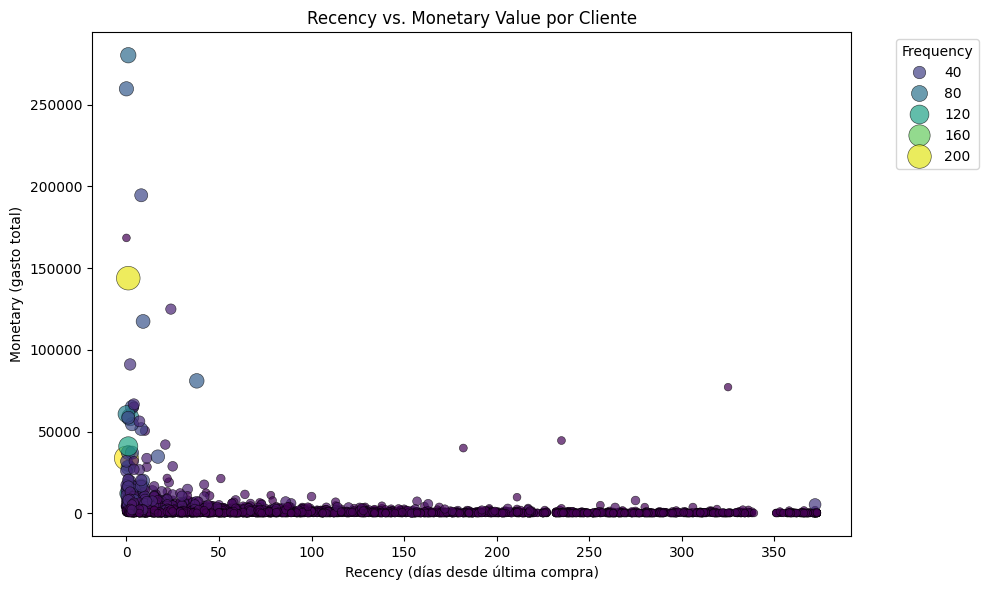

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=rfm,
    x='recency',
    y='monetary',
    size='frequency',      # tamaño de puntos según frecuencia
    hue='frequency',       # color de puntos según frecuencia
    palette='viridis',
    alpha=0.7,
    sizes=(30, 300),       # rango de tamaños
    edgecolor='k'
)
plt.title('Recency vs. Monetary Value por Cliente')
plt.xlabel('Recency (días desde última compra)')
plt.ylabel('Monetary (gasto total)')
plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

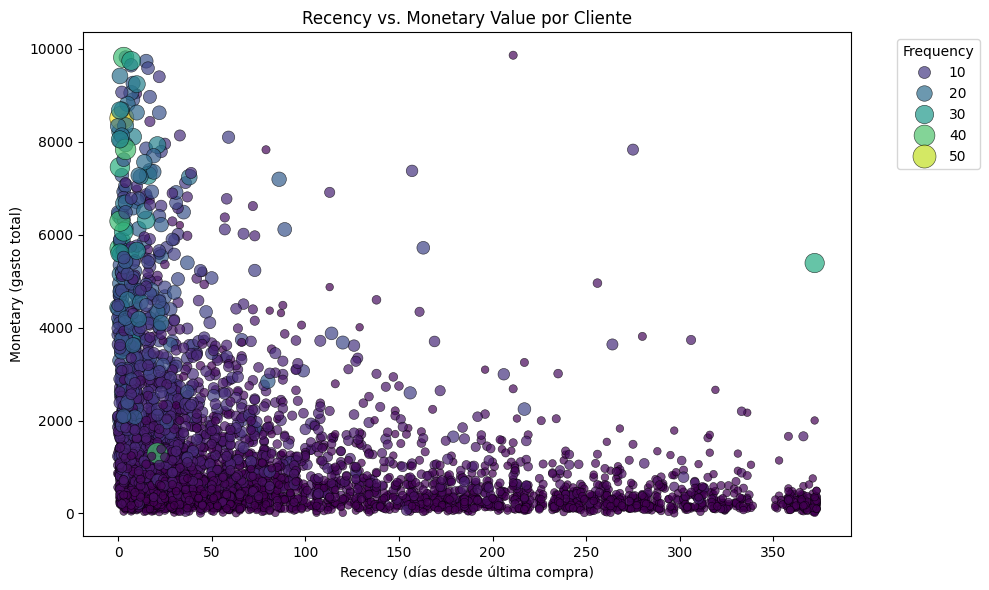

In [ ]:
rfm_lim = rfm[rfm['monetary'] <= 10000]
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=rfm_lim,
    x='recency',
    y='monetary',
    size='frequency',      # tamaño de puntos según frecuencia
    hue='frequency',       # color de puntos según frecuencia
    palette='viridis',
    alpha=0.7,
    sizes=(30, 300),       # rango de tamaños
    edgecolor='k'
)
plt.title('Recency vs. Monetary Value por Cliente')
plt.xlabel('Recency (días desde última compra)')
plt.ylabel('Monetary (gasto total)')
plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Clase 2

In [ ]:
rfm.head(10)

,CustomerID,last_purchase,frequency,monetary,recency
0,12346.0,2011-01-18 10:01:00,1,77183.60,325
1,12347.0,2011-12-07 15:52:00,7,4310.00,2
2,12348.0,2011-09-25 13:13:00,4,1797.24,75
3,12349.0,2011-11-21 09:51:00,1,1757.55,18
4,12350.0,2011-02-02 16:01:00,1,334.40,310
5,12352.0,2011-11-03 14:37:00,8,2506.04,36
6,12353.0,2011-05-19 17:47:00,1,89.00,204
7,12354.0,2011-04-21 13:11:00,1,1079.40,232
8,12355.0,2011-05-09 13:49:00,1,459.40,214
9,12356.0,2011-11-17 08:40:00,3,2811.43,22


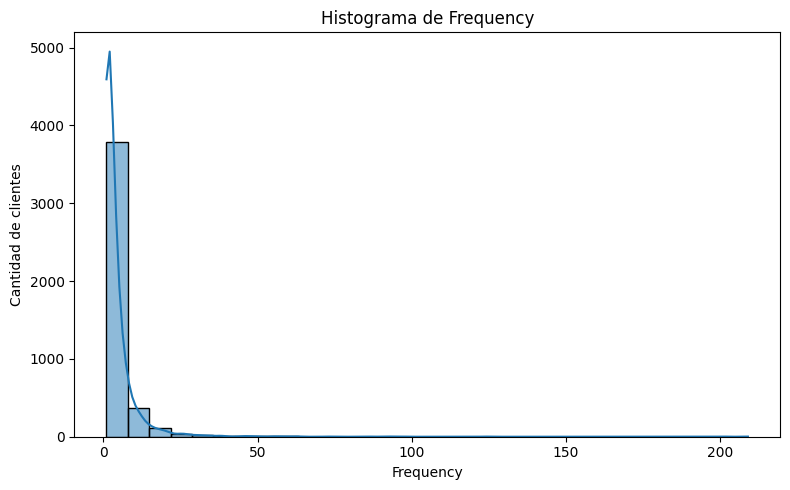

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=rfm, x='frequency', bins=30, kde=True)  # `kde=True` añade una curva de densidad

plt.title("Histograma de Frequency")
plt.xlabel("Frequency")
plt.ylabel("Cantidad de clientes")
plt.tight_layout()
plt.show()

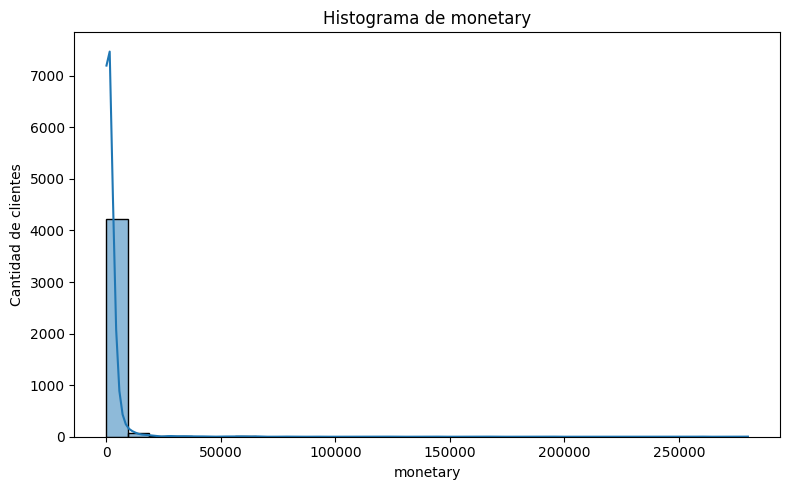

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=rfm, x='monetary', bins=30, kde=True)  # `kde=True` añade una curva de densidad

plt.title("Histograma de monetary")
plt.xlabel("monetary")
plt.ylabel("Cantidad de clientes")
plt.tight_layout()
plt.show()

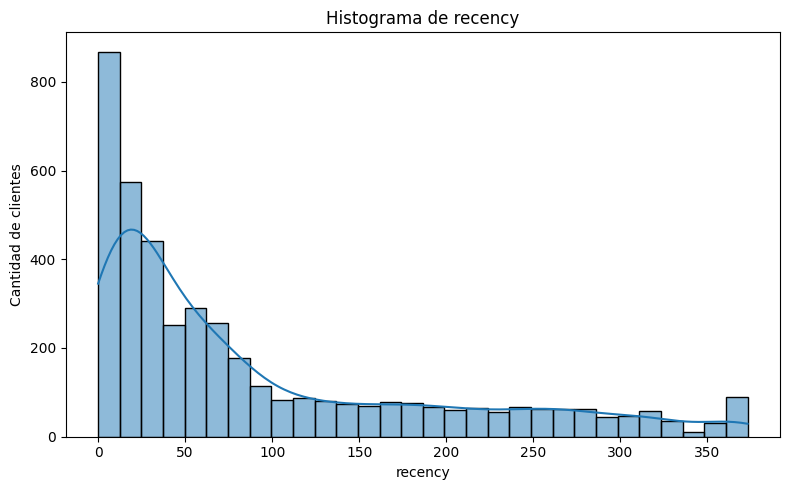

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=rfm, x='recency', bins=30, kde=True)  # `kde=True` añade una curva de densidad

plt.title("Histograma de recency")
plt.xlabel("recency")
plt.ylabel("Cantidad de clientes")
plt.tight_layout()
plt.show()

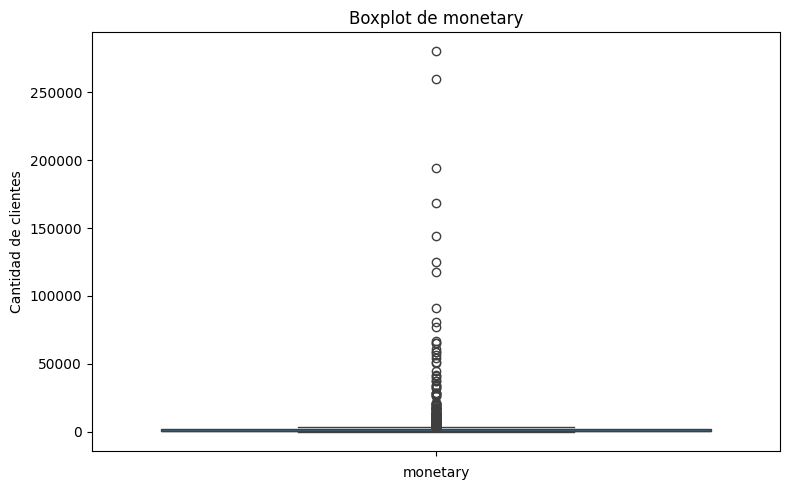

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=rfm, y='monetary')

plt.title("Boxplot de monetary")
plt.xlabel("monetary")
plt.ylabel("Cantidad de clientes")
plt.tight_layout()
plt.show()

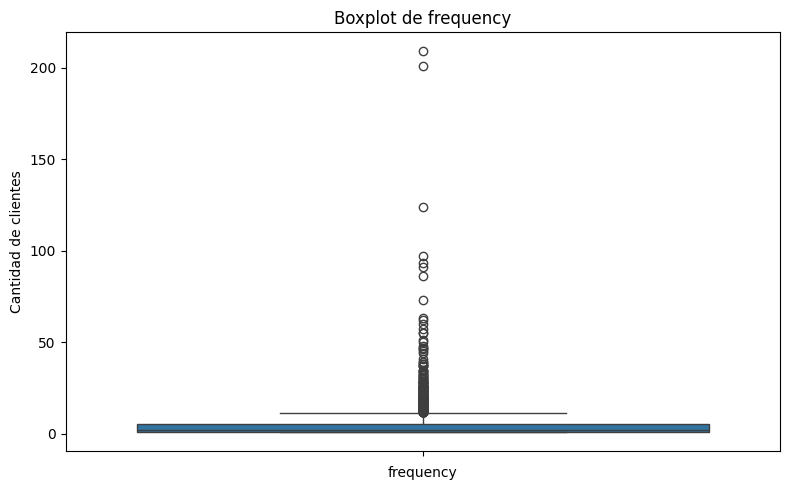

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=rfm, y='frequency')

plt.title("Boxplot de frequency")
plt.xlabel("frequency")
plt.ylabel("Cantidad de clientes")
plt.tight_layout()
plt.show()

In [ ]:
rfm.sort_values(by='recency', ascending=False).head(5)

,CustomerID,last_purchase,frequency,monetary,recency
355,12791.0,2010-12-01 11:27:00,1,192.60,373
3867,17643.0,2010-12-01 14:38:00,1,101.55,373
1392,14237.0,2010-12-01 13:20:00,1,161.00,373
2067,15165.0,2010-12-01 14:03:00,1,487.75,373
4180,18074.0,2010-12-01 09:53:00,1,489.60,373


In [ ]:
# Crear columnas 'one_time' y 'avg_per_purchase'
rfm['one_time'] = rfm['frequency'].apply(lambda x: "One-timer" if x == 1 else "More than once")
rfm['avg_per_purchase'] = rfm['monetary'] / rfm['frequency']

# Agrupar por la columna 'one_time' (si es necesario para análisis posterior)
rfm2 = rfm.groupby('one_time')

# Mostrar las primeras filas (sin agrupar, para que sea similar al head en R)
print(rfm.head())

  CustomerID       last_purchase  frequency  monetary  recency  \
0    12346.0 2011-01-18 10:01:00          1  77183.60      325   
1    12347.0 2011-12-07 15:52:00          7   4310.00        2   
2    12348.0 2011-09-25 13:13:00          4   1797.24       75   
3    12349.0 2011-11-21 09:51:00          1   1757.55       18   
4    12350.0 2011-02-02 16:01:00          1    334.40      310   

         one_time  avg_per_purchase  
0       One-timer      77183.600000  
1  More than once        615.714286  
2  More than once        449.310000  
3       One-timer       1757.550000  
4       One-timer        334.400000  


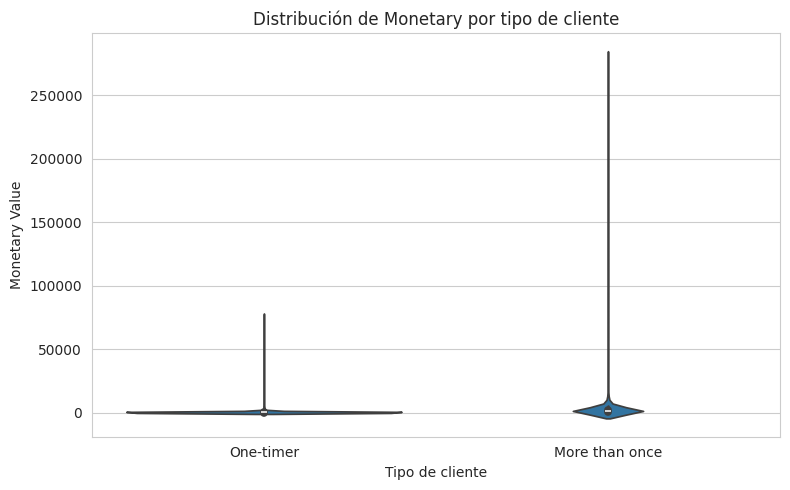

In [ ]:
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

sns.violinplot(data=rfm, x='one_time', y='monetary')

plt.title("Distribución de Monetary por tipo de cliente")
plt.xlabel("Tipo de cliente")
plt.ylabel("Monetary Value")
plt.tight_layout()
plt.show()

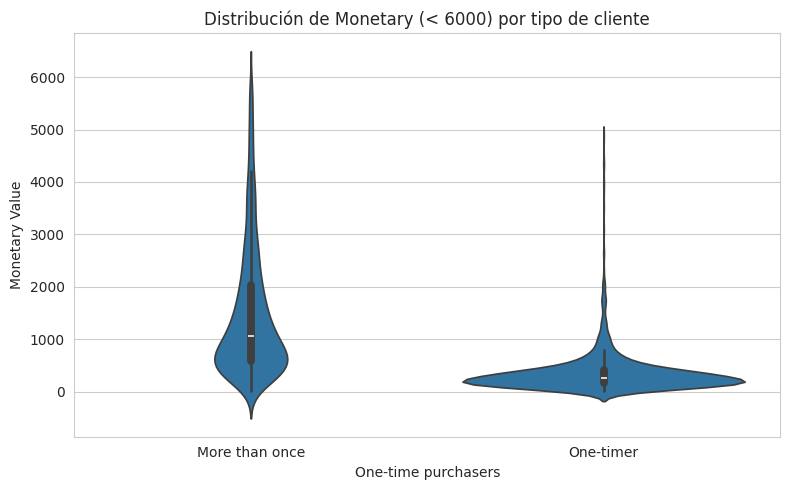

In [ ]:
# Filtrar los datos
rfm_filtrado = rfm[rfm['monetary'] < 6000]

# Crear el gráfico
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

sns.violinplot(data=rfm_filtrado, x='one_time', y='monetary')

plt.xlabel("One-time purchasers")
plt.ylabel("Monetary Value")
plt.title("Distribución de Monetary (< 6000) por tipo de cliente")
plt.tight_layout()
plt.show()

In [ ]:
# Crear las columnas para R, F y M rankings (valores del 1 al 5)
rfm['R_rank'] = pd.cut(rfm['recency'], bins=5, labels=False) + 1
rfm['F_rank'] = pd.cut(rfm['frequency'], bins=5, labels=False) + 1
rfm['M_rank']= pd.cut(rfm['monetary'], bins=5, labels=False) + 1

In [ ]:
rfm['R_qrank'] = pd.qcut(rfm['recency'], q=5, labels=False) + 1
rfm['F_qrank'] = pd.qcut(rfm['frequency'], q=5, labels=False, duplicates= 'drop') + 1
rfm['M_qrank'] = pd.qcut(rfm['monetary'], q=5, labels=False, duplicates= 'drop') + 1



In [ ]:
rfm

,CustomerID,last_purchase,frequency,monetary,recency,one_time,avg_per_purchase,R_rank,F_rank,M_rank,R_qrank,F_qrank,M_qrank
0,12346.0,2011-01-18 10:01:00,1,77183.60,325,One-timer,77183.600000,5,1,2,5,1,5
1,12347.0,2011-12-07 15:52:00,7,4310.00,2,More than once,615.714286,1,1,1,1,4,5
2,12348.0,2011-09-25 13:13:00,4,1797.24,75,More than once,449.310000,2,1,1,4,3,4
3,12349.0,2011-11-21 09:51:00,1,1757.55,18,One-timer,1757.550000,1,1,1,2,1,4
4,12350.0,2011-02-02 16:01:00,1,334.40,310,One-timer,334.400000,5,1,1,5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,18280.0,2011-03-07 09:52:00,1,180.60,277,One-timer,180.600000,4,1,1,5,1,1
4334,18281.0,2011-06-12 10:53:00,1,80.82,180,One-timer,80.820000,3,1,1,5,1,1
4335,18282.0,2011-12-02 11:43:00,2,178.05,7,More than once,89.025000,1,1,1,1,1,1
4336,18283.0,2011-12-06 12:02:00,16,2094.88,3,More than once,130.930000,1,1,1,1,4,5


In [ ]:
rfm3 = rfm.sort_values(by= ['R_rank', 'F_rank', 'M_rank'], ascending= [False, False, False])
print(rfm3.head(5))

   CustomerID       last_purchase  frequency  monetary  recency  \
0     12346.0 2011-01-18 10:01:00          1  77183.60      325   
4     12350.0 2011-02-02 16:01:00          1    334.40      310   
23    12373.0 2011-02-01 13:10:00          1    364.60      311   
26    12377.0 2011-01-28 15:45:00          2   1628.12      315   
33    12386.0 2011-01-06 12:37:00          2    401.90      337   

          one_time  avg_per_purchase  R_rank  F_rank  M_rank  R_qrank  \
0        One-timer          77183.60       5       1       2        5   
4        One-timer            334.40       5       1       1        5   
23       One-timer            364.60       5       1       1        5   
26  More than once            814.06       5       1       1        5   
33  More than once            200.95       5       1       1        5   

    F_qrank  M_qrank  
0         1        5  
4         1        2  
23        1        2  
26        1        4  
33        1        2  


In [ ]:
tabla_contingencia = pd.crosstab(rfm['R_rank'], rfm['R_qrank'], rownames=['pd.cut'], colnames=['pd.qcut'])
tabla_contingencia

pd.qcut,1,2,3,4,5
pd.cut,,,,,
1,868,880,863,70,0
2,0,0,0,616,0
3,0,0,0,180,235
4,0,0,0,0,356
5,0,0,0,0,270


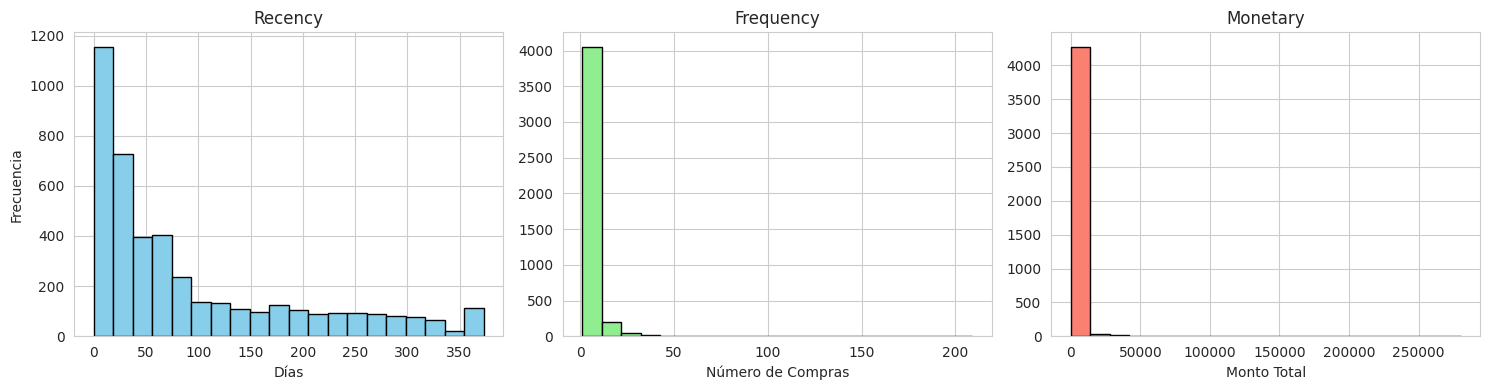

In [ ]:

# Crear figura con 1 fila y 3 columnas
plt.figure(figsize=(15, 4))

# Histograma de recency
plt.subplot(1, 3, 1)
plt.hist(rfm3['recency'], bins=20, color='skyblue', edgecolor='black')
plt.title('Recency')
plt.xlabel('Días')
plt.ylabel('Frecuencia')

# Histograma de frequency
plt.subplot(1, 3, 2)
plt.hist(rfm3['frequency'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Frequency')
plt.xlabel('Número de Compras')

# Histograma de monetary
plt.subplot(1, 3, 3)
plt.hist(rfm3['monetary'], bins=20, color='salmon', edgecolor='black')
plt.title('Monetary')
plt.xlabel('Monto Total')

plt.tight_layout()
plt.show()

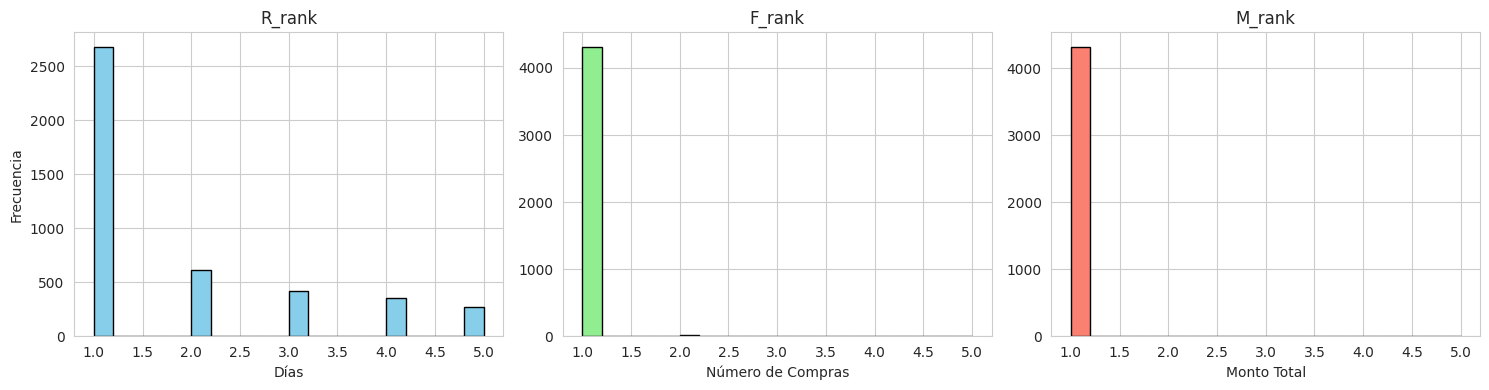

In [ ]:

# Crear figura con 1 fila y 3 columnas
plt.figure(figsize=(15, 4))

# Histograma de recency
plt.subplot(1, 3, 1)
plt.hist(rfm3['R_rank'], bins=20, color='skyblue', edgecolor='black')
plt.title('R_rank')
plt.xlabel('Días')
plt.ylabel('Frecuencia')

# Histograma de frequency
plt.subplot(1, 3, 2)
plt.hist(rfm3['F_rank'], bins=20, color='lightgreen', edgecolor='black')
plt.title('F_rank')
plt.xlabel('Número de Compras')

# Histograma de monetary
plt.subplot(1, 3, 3)
plt.hist(rfm3['M_rank'], bins=20, color='salmon', edgecolor='black')
plt.title('M_rank')
plt.xlabel('Monto Total')

plt.tight_layout()
plt.show()

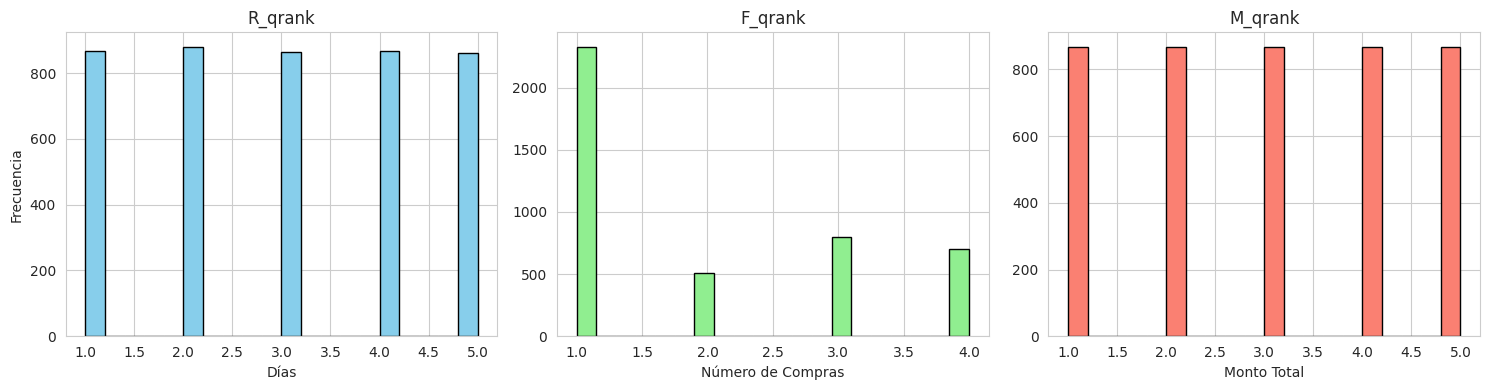

In [ ]:
# Crear figura con 1 fila y 3 columnas
plt.figure(figsize=(15, 4))

# Histograma de recency
plt.subplot(1, 3, 1)
plt.hist(rfm3['R_qrank'], bins=20, color='skyblue', edgecolor='black')
plt.title('R_qrank')
plt.xlabel('Días')
plt.ylabel('Frecuencia')

# Histograma de frequency
plt.subplot(1, 3, 2)
plt.hist(rfm3['F_qrank'], bins=20, color='lightgreen', edgecolor='black')
plt.title('F_qrank')
plt.xlabel('Número de Compras')

# Histograma de monetary
plt.subplot(1, 3, 3)
plt.hist(rfm3['M_qrank'], bins=20, color='salmon', edgecolor='black')
plt.title('M_qrank')
plt.xlabel('Monto Total')

plt.tight_layout()
plt.show()

In [ ]:
# Crear el código de grupo RFM combinando R, F y M (por ejemplo: 543, 321, etc.)
rfm['groupRFM'] = rfm['R_rank'] * 100 + rfm['F_rank'] * 10 + rfm['M_rank']
rfm['score'] = rfm[['R_rank', 'F_rank', 'M_rank']].sum(axis=1)

# Mostrar los primeros registros
print(rfm.head())

  CustomerID       last_purchase  frequency  monetary  recency  \
0    12346.0 2011-01-18 10:01:00          1  77183.60      325   
1    12347.0 2011-12-07 15:52:00          7   4310.00        2   
2    12348.0 2011-09-25 13:13:00          4   1797.24       75   
3    12349.0 2011-11-21 09:51:00          1   1757.55       18   
4    12350.0 2011-02-02 16:01:00          1    334.40      310   

         one_time  avg_per_purchase  R_rank  F_rank  M_rank  R_qrank  F_qrank  \
0       One-timer      77183.600000       5       1       2        5        1   
1  More than once        615.714286       1       1       1        1        4   
2  More than once        449.310000       2       1       1        4        3   
3       One-timer       1757.550000       1       1       1        2        1   
4       One-timer        334.400000       5       1       1        5        1   

   M_qrank  groupRFM  score  
0        5       512      8  
1        5       111      3  
2        4       211      

In [ ]:
# Crear el código de grupo RFM combinando R, F y M (por ejemplo: 543, 321, etc.)
rfm['groupqRFM'] = rfm['R_qrank'] * 100 + rfm['F_qrank'] * 10 + rfm['M_qrank']
rfm['qscore'] = rfm[['R_qrank', 'F_qrank', 'M_qrank']].sum(axis=1)

# Mostrar los primeros registros
print(rfm.head())

  CustomerID       last_purchase  frequency  monetary  recency  \
0    12346.0 2011-01-18 10:01:00          1  77183.60      325   
1    12347.0 2011-12-07 15:52:00          7   4310.00        2   
2    12348.0 2011-09-25 13:13:00          4   1797.24       75   
3    12349.0 2011-11-21 09:51:00          1   1757.55       18   
4    12350.0 2011-02-02 16:01:00          1    334.40      310   

         one_time  avg_per_purchase  R_rank  F_rank  M_rank  R_qrank  F_qrank  \
0       One-timer      77183.600000       5       1       2        5        1   
1  More than once        615.714286       1       1       1        1        4   
2  More than once        449.310000       2       1       1        4        3   
3       One-timer       1757.550000       1       1       1        2        1   
4       One-timer        334.400000       5       1       1        5        1   

   M_qrank  groupRFM  score  groupqRFM  qscore  
0        5       512      8        515      11  
1        5       1

In [ ]:
rfm.head(10)

,CustomerID,last_purchase,frequency,monetary,recency,one_time,avg_per_purchase,R_rank,F_rank,M_rank,R_qrank,F_qrank,M_qrank,groupRFM,score,groupqRFM,qscore
0,12346.0,2011-01-18 10:01:00,1,77183.60,325,One-timer,77183.600000,5,1,2,5,1,5,512,8,515,11
1,12347.0,2011-12-07 15:52:00,7,4310.00,2,More than once,615.714286,1,1,1,1,4,5,111,3,145,10
2,12348.0,2011-09-25 13:13:00,4,1797.24,75,More than once,449.310000,2,1,1,4,3,4,211,4,434,11
3,12349.0,2011-11-21 09:51:00,1,1757.55,18,One-timer,1757.550000,1,1,1,2,1,4,111,3,214,7
4,12350.0,2011-02-02 16:01:00,1,334.40,310,One-timer,334.400000,5,1,1,5,1,2,511,7,512,8
5,12352.0,2011-11-03 14:37:00,8,2506.04,36,More than once,313.255000,1,1,1,3,4,5,111,3,345,12
6,12353.0,2011-05-19 17:47:00,1,89.00,204,One-timer,89.000000,3,1,1,5,1,1,311,5,511,7
7,12354.0,2011-04-21 13:11:00,1,1079.40,232,One-timer,1079.400000,4,1,1,5,1,4,411,6,514,10
8,12355.0,2011-05-09 13:49:00,1,459.40,214,One-timer,459.400000,3,1,1,5,1,2,311,5,512,8
9,12356.0,2011-11-17 08:40:00,3,2811.43,22,More than once,937.143333,1,1,1,2,2,5,111,3,225,9


In [ ]:
countRFM = rfm['score'].value_counts().reset_index()
countRFM.columns = ['score', 'count']
countRFM = countRFM.sort_values(by='score')
print(countRFM)

   score  count
0      3   2653
1      4    628
2      5    422
3      6    360
4      7    271
5      8      3
6      9      1


In [ ]:
countRFM = rfm['qscore'].value_counts().reset_index()
countRFM.columns = ['qscore', 'count']
countRFM = countRFM.sort_values(by='qscore')
print(countRFM)

    qscore  count
9        3     53
7        4    172
6        5    325
4        6    490
0        7    802
1        8    775
3        9    562
2       10    670
5       11    332
8       12    132
10      13     20
11      14      5


<ipython-input-38-33e1786c5416>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=countRFM, x='qscore', y='count', palette='magma')


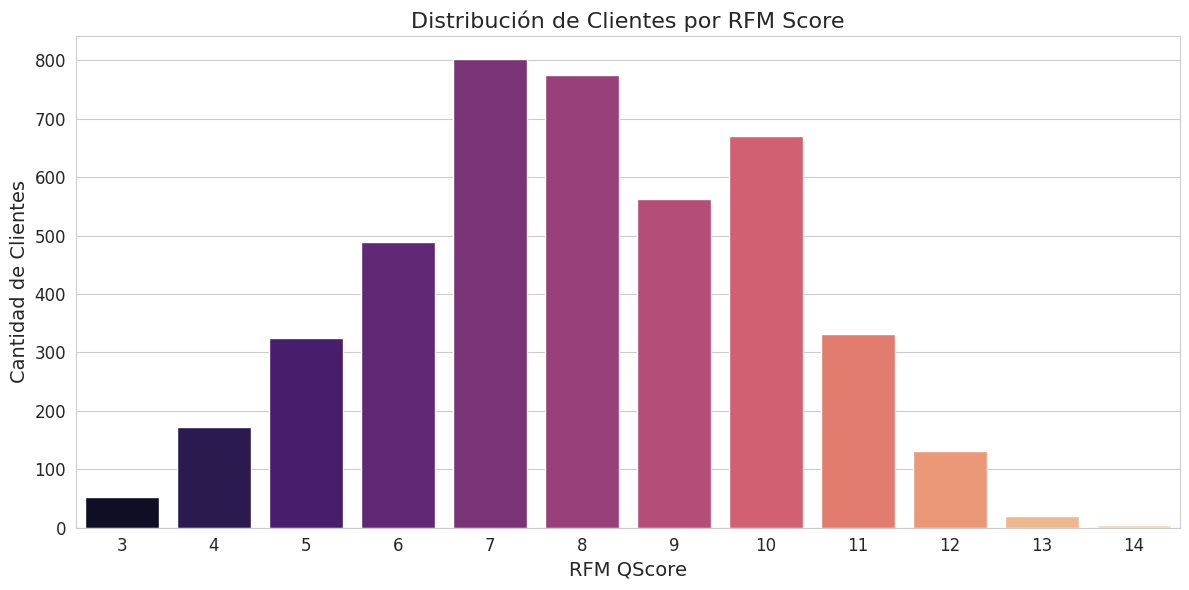

In [ ]:
# Gráfico de barras para score RFM
plt.figure(figsize=(12, 6))
sns.barplot(data=countRFM, x='qscore', y='count', palette='magma')

# Estilo limpio y profesional
sns.set_style("whitegrid")
plt.title("Distribución de Clientes por RFM Score", fontsize=16)
plt.xlabel("RFM QScore", fontsize=14)
plt.ylabel("Cantidad de Clientes", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
rfm3 = rfm.sort_values(by=['R_rank', 'F_rank', 'M_rank'], ascending=[False, False, False])
print(rfm3.head(5))

   CustomerID       last_purchase  frequency  monetary  recency  \
0     12346.0 2011-01-18 10:01:00          1  77183.60      325   
4     12350.0 2011-02-02 16:01:00          1    334.40      310   
23    12373.0 2011-02-01 13:10:00          1    364.60      311   
26    12377.0 2011-01-28 15:45:00          2   1628.12      315   
33    12386.0 2011-01-06 12:37:00          2    401.90      337   

          one_time  avg_per_purchase  R_rank  F_rank  M_rank  R_qrank  \
0        One-timer          77183.60       5       1       2        5   
4        One-timer            334.40       5       1       1        5   
23       One-timer            364.60       5       1       1        5   
26  More than once            814.06       5       1       1        5   
33  More than once            200.95       5       1       1        5   

    F_qrank  M_qrank  groupRFM  score  groupqRFM  qscore  
0         1        5       512      8        515      11  
4         1        2       511      7   

* Realizar una segmentación con KMeans -> Trabajo





1.   Elegir las variables
2.   Revisar la distribución de las variables
3.   Normalizar variables
4.   Elegir el # de segmentos Codo vs silueta.
5.   Segmentar
6.   Recomendar en base a segmentación




In [ ]:
rfm3.head(10)

,CustomerID,last_purchase,frequency,monetary,recency,one_time,avg_per_purchase,R_rank,F_rank,M_rank,R_qrank,F_qrank,M_qrank,groupRFM,score,groupqRFM,qscore
0,12346.0,2011-01-18 10:01:00,1,77183.60,325,One-timer,77183.600,5,1,2,5,1,5,512,8,515,11
4,12350.0,2011-02-02 16:01:00,1,334.40,310,One-timer,334.400,5,1,1,5,1,2,511,7,512,8
23,12373.0,2011-02-01 13:10:00,1,364.60,311,One-timer,364.600,5,1,1,5,1,2,511,7,512,8
26,12377.0,2011-01-28 15:45:00,2,1628.12,315,More than once,814.060,5,1,1,5,1,4,511,7,514,10
33,12386.0,2011-01-06 12:37:00,2,401.90,337,More than once,200.950,5,1,1,5,1,2,511,7,512,8
43,12401.0,2011-02-09 13:50:00,1,84.30,303,One-timer,84.300,5,1,1,5,1,1,511,7,511,7
44,12402.0,2011-01-20 13:49:00,1,225.60,323,One-timer,225.600,5,1,1,5,1,1,511,7,511,7
51,12410.0,2011-02-04 10:39:00,2,693.33,308,More than once,346.665,5,1,1,5,1,3,511,7,513,9
77,12441.0,2010-12-08 10:45:00,1,173.55,366,One-timer,173.550,5,1,1,5,1,1,511,7,511,7
114,12489.0,2011-01-07 13:13:00,1,334.93,336,One-timer,334.930,5,1,1,5,1,2,511,7,512,8


In [ ]:
# Reemplazar valores menores o iguales a 0 con NaN
rfm3['frequency'] = rfm3['frequency'].apply(lambda x: np.nan if x <= 0 else x)
rfm3['monetary'] = rfm3['monetary'].apply(lambda x: np.nan if x <= 0 else x)
rfm3['recency'] = rfm3['recency'].apply(lambda x: np.nan if x <= 0 else x)

# Eliminar filas con cualquier valor nulo
rfm3 = rfm3.dropna()

In [ ]:
# Crear columnas logarítmicas (añadiendo 0.1 a monetary para evitar log(0))
rfm3['rec_log'] = np.log(rfm3['recency'])
rfm3['F_log'] = np.log(rfm3['frequency'])
rfm3['MV_log'] = np.log(rfm3['monetary'] + 0.1)

# Filtramos para asegurar que no haya valores no finitos
recency_clean = rfm3['rec_log'][np.isfinite(rfm3['rec_log'])]
frequency_clean = rfm3['F_log'][np.isfinite(rfm3['F_log'])]
monetary_clean = rfm3['MV_log'][np.isfinite(rfm3['MV_log'])]
rfm3.head()

,CustomerID,last_purchase,frequency,monetary,recency,one_time,avg_per_purchase,R_rank,F_rank,M_rank,R_qrank,F_qrank,M_qrank,groupRFM,score,groupqRFM,qscore,rec_log,F_log,MV_log
0,12346.0,2011-01-18 10:01:00,1,77183.60,325.0,One-timer,77183.60,5,1,2,5,1,5,512,8,515,11,5.783825,0.000000,11.253944
4,12350.0,2011-02-02 16:01:00,1,334.40,310.0,One-timer,334.40,5,1,1,5,1,2,511,7,512,8,5.736572,0.000000,5.812637
23,12373.0,2011-02-01 13:10:00,1,364.60,311.0,One-timer,364.60,5,1,1,5,1,2,511,7,512,8,5.739793,0.000000,5.899075
26,12377.0,2011-01-28 15:45:00,2,1628.12,315.0,More than once,814.06,5,1,1,5,1,4,511,7,514,10,5.752573,0.693147,7.395243
33,12386.0,2011-01-06 12:37:00,2,401.90,337.0,More than once,200.95,5,1,1,5,1,2,511,7,512,8,5.820083,0.693147,5.996452


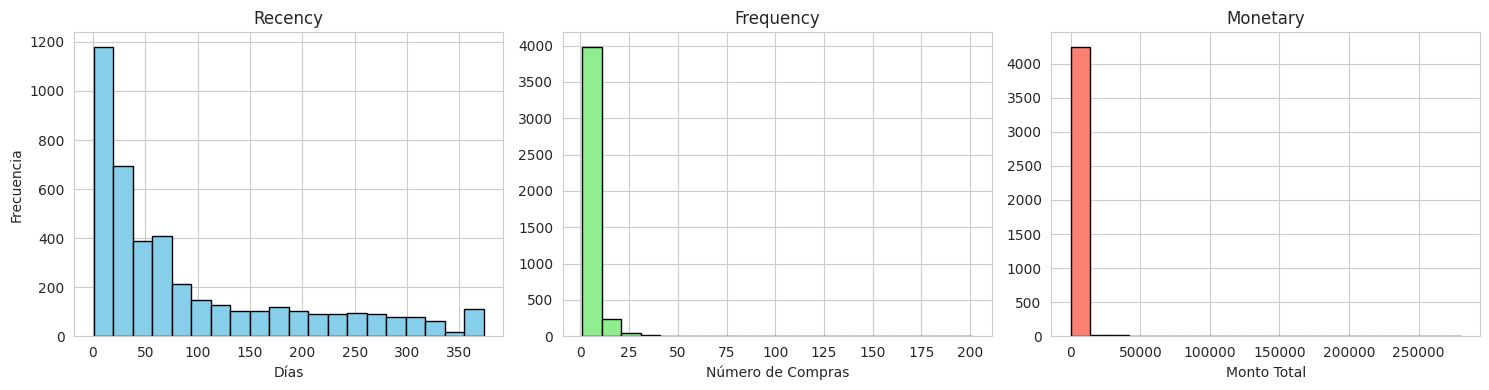

In [ ]:

# Crear figura con 1 fila y 3 columnas
plt.figure(figsize=(15, 4))

# Histograma de recency
plt.subplot(1, 3, 1)
plt.hist(rfm3['recency'], bins=20, color='skyblue', edgecolor='black')
plt.title('Recency')
plt.xlabel('Días')
plt.ylabel('Frecuencia')

# Histograma de frequency
plt.subplot(1, 3, 2)
plt.hist(rfm3['frequency'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Frequency')
plt.xlabel('Número de Compras')

# Histograma de monetary
plt.subplot(1, 3, 3)
plt.hist(rfm3['monetary'], bins=20, color='salmon', edgecolor='black')
plt.title('Monetary')
plt.xlabel('Monto Total')

plt.tight_layout()
plt.show()

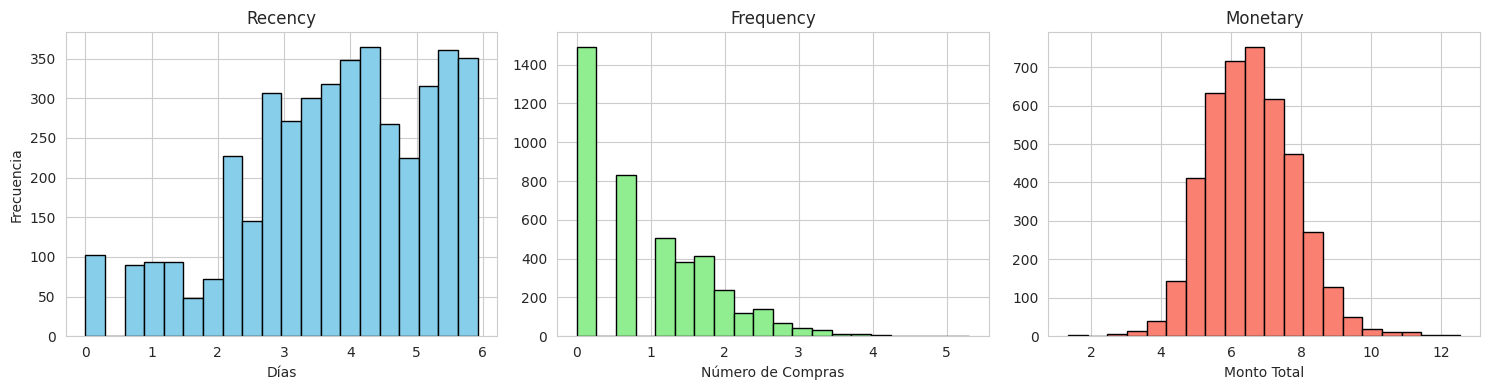

In [ ]:
# Crear figura con 1 fila y 3 columnas
plt.figure(figsize=(15, 4))

# Histograma de recency
plt.subplot(1, 3, 1)
plt.hist(rfm3['rec_log'], bins=20, color='skyblue', edgecolor='black')
plt.title('Recency')
plt.xlabel('Días')
plt.ylabel('Frecuencia')

# Histograma de frequency
plt.subplot(1, 3, 2)
plt.hist(rfm3['F_log'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Frequency')
plt.xlabel('Número de Compras')

# Histograma de monetary
plt.subplot(1, 3, 3)
plt.hist(rfm3['MV_log'], bins=20, color='salmon', edgecolor='black')
plt.title('Monetary')
plt.xlabel('Monto Total')

plt.tight_layout()
plt.show()

In [ ]:
rfm_Seg = rfm3[['rec_log', 'F_log','MV_log']]
rfm_Seg.head(10)

,rec_log,F_log,MV_log
0,5.783825,0.000000,11.253944
4,5.736572,0.000000,5.812637
23,5.739793,0.000000,5.899075
26,5.752573,0.693147,7.395243
33,5.820083,0.693147,5.996452
43,5.713733,0.000000,4.435567
44,5.777652,0.000000,5.419207
51,5.730100,0.693147,6.541650
77,5.902633,0.000000,5.157042
114,5.817111,0.000000,5.814220


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_Seg = scaler.fit_transform(rfm_Seg)

In [ ]:
# Aplicar K-means con 3 clusters, 50 inicializaciones y máximo 10 iteraciones
kmm = KMeans(n_clusters=3, n_init=50, max_iter=10, random_state=42)
kmm.fit(rfm_Seg)
rfm3['cluster'] = kmm.labels_

In [ ]:
rfm3.head(10)

,CustomerID,last_purchase,frequency,monetary,recency,one_time,avg_per_purchase,R_rank,F_rank,M_rank,...,F_qrank,M_qrank,groupRFM,score,groupqRFM,qscore,rec_log,F_log,MV_log,cluster
0,12346.0,2011-01-18 10:01:00,1,77183.60,325.0,One-timer,77183.600,5,1,2,...,1,5,512,8,515,11,5.783825,0.000000,11.253944,2
4,12350.0,2011-02-02 16:01:00,1,334.40,310.0,One-timer,334.400,5,1,1,...,1,2,511,7,512,8,5.736572,0.000000,5.812637,0
23,12373.0,2011-02-01 13:10:00,1,364.60,311.0,One-timer,364.600,5,1,1,...,1,2,511,7,512,8,5.739793,0.000000,5.899075,0
26,12377.0,2011-01-28 15:45:00,2,1628.12,315.0,More than once,814.060,5,1,1,...,1,4,511,7,514,10,5.752573,0.693147,7.395243,2
33,12386.0,2011-01-06 12:37:00,2,401.90,337.0,More than once,200.950,5,1,1,...,1,2,511,7,512,8,5.820083,0.693147,5.996452,0
43,12401.0,2011-02-09 13:50:00,1,84.30,303.0,One-timer,84.300,5,1,1,...,1,1,511,7,511,7,5.713733,0.000000,4.435567,0
44,12402.0,2011-01-20 13:49:00,1,225.60,323.0,One-timer,225.600,5,1,1,...,1,1,511,7,511,7,5.777652,0.000000,5.419207,0
51,12410.0,2011-02-04 10:39:00,2,693.33,308.0,More than once,346.665,5,1,1,...,1,3,511,7,513,9,5.730100,0.693147,6.541650,0
77,12441.0,2010-12-08 10:45:00,1,173.55,366.0,One-timer,173.550,5,1,1,...,1,1,511,7,511,7,5.902633,0.000000,5.157042,0
114,12489.0,2011-01-07 13:13:00,1,334.93,336.0,One-timer,334.930,5,1,1,...,1,2,511,7,512,8,5.817111,0.000000,5.814220,0


Within-cluster sum of squares (WSS) por número de clusters: [12909.000000000011, 6360.639197599152, 4844.342107217331, 3942.9375805329914, 3382.9440952868513, 2908.2929613920014, 2617.401580751658, 2400.277981349413, 2205.5672691036484, 2040.784257117726]


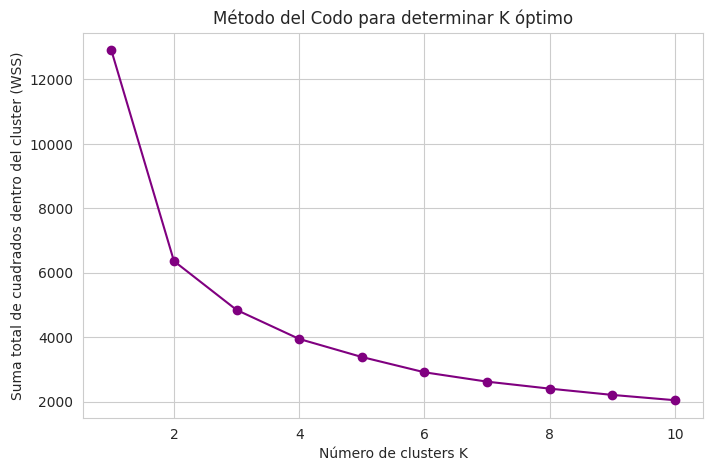

In [ ]:
# Asegúrate de tener df3 bien escalado y sin infinitos
data = rfm_Seg  # Este debe ser un NumPy array o un DataFrame sin NaNs ni Infinitos

# Método del Codo
k_max = 10
wss = []

for k in range(1, k_max + 1):
    kmeans = KMeans(n_clusters=k, n_init=50, max_iter=15, random_state=123)
    kmeans.fit(data)
    wss.append(kmeans.inertia_)  # inertia_ es equivalente a tot.withinss en R

# Mostrar valores de WSS
print("Within-cluster sum of squares (WSS) por número de clusters:", wss)

# Gráfico del Codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, k_max + 1), wss, marker='o', linestyle='-', color='purple')
plt.xlabel("Número de clusters K")
plt.ylabel("Suma total de cuadrados dentro del cluster (WSS)")
plt.title("Método del Codo para determinar K óptimo")
plt.grid(True)
plt.show()

In [ ]:
# Aplicar K-means con 3 clusters, 50 inicializaciones y máximo 10 iteraciones
kmm = KMeans(n_clusters=4, n_init=50, max_iter=10, random_state=42)
kmm.fit(rfm_Seg)
rfm3['cluster_v1'] = kmm.labels_

In [ ]:
rfm3.head(1)

,CustomerID,last_purchase,frequency,monetary,recency,one_time,avg_per_purchase,R_rank,F_rank,M_rank,...,groupRFM,score,groupqRFM,qscore,rec_log,F_log,MV_log,cluster,cluster_v1,cluster_v2
0,12346.0,2011-01-18 10:01:00,1,77183.6,325.0,One-timer,77183.6,5,1,2,...,512,8,515,11,5.783825,0.0,11.253944,2,1,5


In [ ]:
rfm3[['CustomerID', 'frequency','monetary','recency', 'avg_per_purchase','cluster','cluster_v1','cluster_v2']]

,CustomerID,frequency,monetary,recency,avg_per_purchase,cluster,cluster_v1,cluster_v2
0,12346.0,1,77183.60,325.0,77183.600000,2,1,5
4,12350.0,1,334.40,310.0,334.400000,0,0,1
23,12373.0,1,364.60,311.0,364.600000,0,0,1
26,12377.0,2,1628.12,315.0,814.060000,2,1,0
33,12386.0,2,401.90,337.0,200.950000,0,0,1
...,...,...,...,...,...,...,...,...
4331,18277.0,1,110.38,58.0,110.380000,0,0,2
4332,18278.0,1,173.90,73.0,173.900000,0,0,2
4335,18282.0,2,178.05,7.0,89.025000,2,2,2
4336,18283.0,16,2094.88,3.0,130.930000,1,3,3


In [ ]:
# Aplicar K-means con 3 clusters, 50 inicializaciones y máximo 10 iteraciones
kmm = KMeans(n_clusters=6, n_init=50, max_iter=10, random_state=42)
kmm.fit(rfm_Seg)
rfm3['cluster_v2'] = kmm.labels_

In [ ]:
#rfm_f = rfm3[['CustomerID', 'frequency','monetary','recency', 'avg_per_purchase','cluster','cluster_v1','cluster_v2']]
rfm_f = rfm3[['CustomerID', 'frequency','monetary','recency', 'avg_per_purchase','cluster','cluster_v1','cluster_v2']]
rfm_f.head(10)

,CustomerID,frequency,monetary,recency,avg_per_purchase,cluster,cluster_v1,cluster_v2
0,12346.0,1,77183.60,325.0,77183.600,2,1,5
4,12350.0,1,334.40,310.0,334.400,0,0,1
23,12373.0,1,364.60,311.0,364.600,0,0,1
26,12377.0,2,1628.12,315.0,814.060,2,1,0
33,12386.0,2,401.90,337.0,200.950,0,0,1
43,12401.0,1,84.30,303.0,84.300,0,0,1
44,12402.0,1,225.60,323.0,225.600,0,0,1
51,12410.0,2,693.33,308.0,346.665,0,0,0
77,12441.0,1,173.55,366.0,173.550,0,0,1
114,12489.0,1,334.93,336.0,334.930,0,0,1


In [ ]:
rfm3.head(2)

,CustomerID,last_purchase,frequency,monetary,recency,one_time,avg_per_purchase,R_rank,F_rank,M_rank,...,score,groupqRFM,qscore,Quafrequencyntity,rec_log,F_log,MV_log,cluster,cluster_v1,cluster_v2
0,12346.0,2011-01-18 10:01:00,1,77183.6,325.0,One-timer,77183.6,5,1,2,...,8,515,11,1,5.783825,0.0,11.253944,2,1,5
4,12350.0,2011-02-02 16:01:00,1,334.4,310.0,One-timer,334.4,5,1,1,...,7,512,8,1,5.736572,0.0,5.812637,0,0,1


In [ ]:
rfm_lim

,CustomerID,frequency,monetary,recency,avg_per_purchase,cluster,cluster_v1,cluster_v2
0,12346.0,1,77183.60,325.0,77183.600000,2,1,5
4,12350.0,1,334.40,310.0,334.400000,0,0,1
23,12373.0,1,364.60,311.0,364.600000,0,0,1
26,12377.0,2,1628.12,315.0,814.060000,2,1,0
33,12386.0,2,401.90,337.0,200.950000,0,0,1
...,...,...,...,...,...,...,...,...
4331,18277.0,1,110.38,58.0,110.380000,0,0,2
4332,18278.0,1,173.90,73.0,173.900000,0,0,2
4335,18282.0,2,178.05,7.0,89.025000,2,2,2
4336,18283.0,16,2094.88,3.0,130.930000,1,3,3


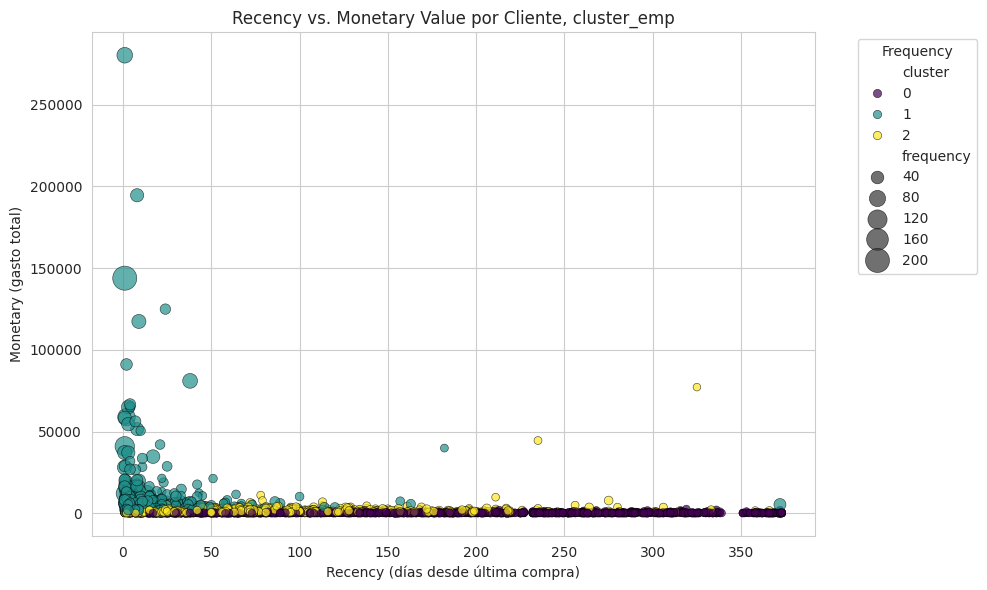

In [ ]:
rfm_lim = rfm_f[rfm_f['monetary'] <= 10000000]
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=rfm_lim,
    x='recency',
    y='monetary',
    size='frequency',      # tamaño de puntos según frecuencia
    hue='cluster',       # color de puntos según frecuencia
    palette='viridis',
    alpha=0.7,
    sizes=(30, 300),       # rango de tamaños
    edgecolor='k'
)
plt.title('Recency vs. Monetary Value por Cliente, cluster_emp')
plt.xlabel('Recency (días desde última compra)')
plt.ylabel('Monetary (gasto total)')
plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

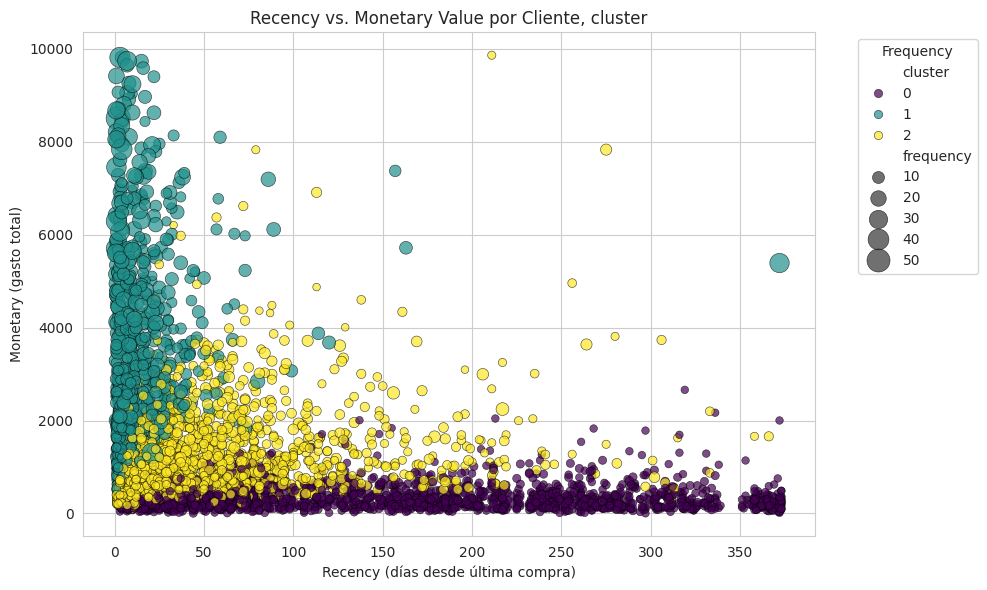

In [ ]:
rfm_lim = rfm_f[rfm_f['monetary'] <= 10000]
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=rfm_lim,
    x='recency',
    y='monetary',
    size='frequency',      # tamaño de puntos según frecuencia
    hue='cluster',       # color de puntos según frecuencia
    palette='viridis',
    alpha=0.7,
    sizes=(30, 300),       # rango de tamaños
    edgecolor='k'
)
plt.title('Recency vs. Monetary Value por Cliente, cluster')
plt.xlabel('Recency (días desde última compra)')
plt.ylabel('Monetary (gasto total)')
plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

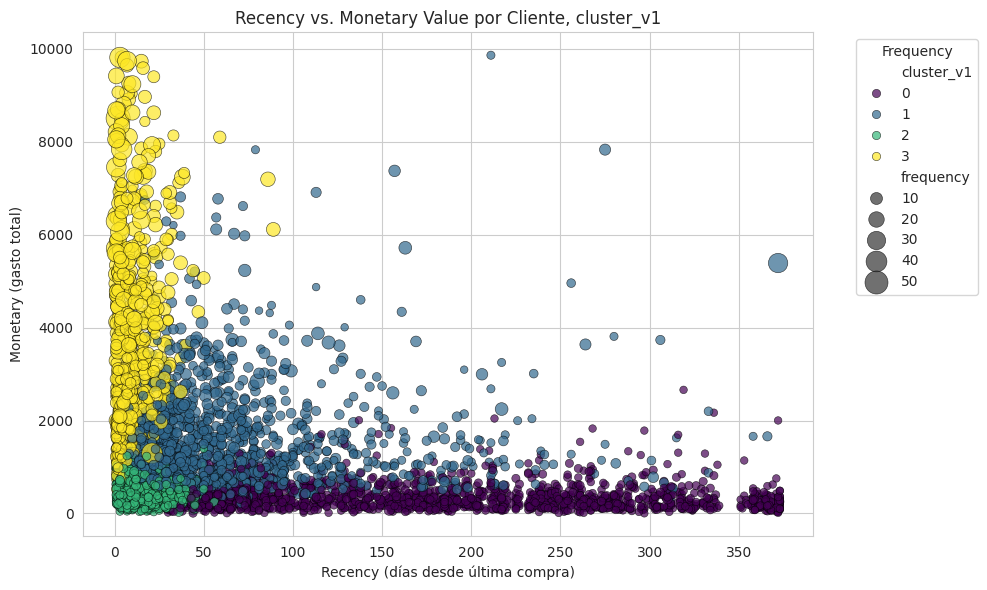

In [ ]:
rfm_lim = rfm_f[rfm_f['monetary'] <= 10000]
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=rfm_lim,
    x='recency',
    y='monetary',
    size='frequency',      # tamaño de puntos según frecuencia
    hue='cluster_v1',       # color de puntos según frecuencia
    palette='viridis',
    alpha=0.7,
    sizes=(30, 300),       # rango de tamaños
    edgecolor='k'
)
plt.title('Recency vs. Monetary Value por Cliente, cluster_v1')
plt.xlabel('Recency (días desde última compra)')
plt.ylabel('Monetary (gasto total)')
plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

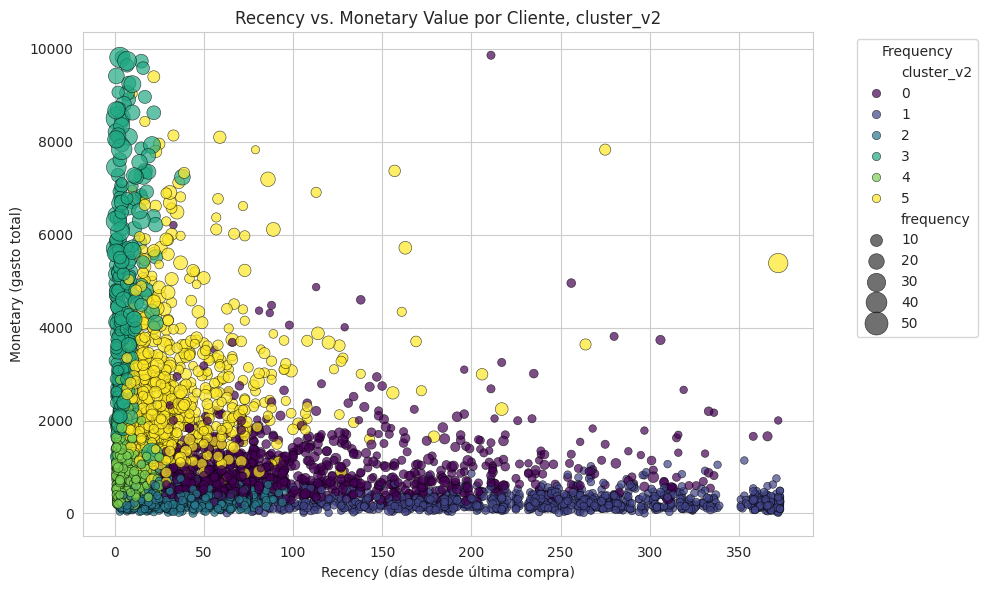

In [ ]:
rfm_lim = rfm_f[rfm_f['monetary'] <= 10000]
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=rfm_lim,
    x='recency',
    y='monetary',
    size='frequency',      # tamaño de puntos según frecuencia
    hue='cluster_v2',       # color de puntos según frecuencia
    palette='viridis',
    alpha=0.7,
    sizes=(30, 300),       # rango de tamaños
    edgecolor='k'
)
plt.title('Recency vs. Monetary Value por Cliente, cluster_v2')
plt.xlabel('Recency (días desde última compra)')
plt.ylabel('Monetary (gasto total)')
plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
rfm3

,CustomerID,last_purchase,frequency,monetary,recency,one_time,avg_per_purchase,R_rank,F_rank,M_rank,...,F_qrank,M_qrank,cluster,cluster_emp,Quafrequencyntity,rec_log,F_log,MV_log,cluster_v1,cluster_v2
0,12346.0,2011-01-18 10:01:00,1,77183.60,325.0,One-timer,77183.600000,5,1,2,...,1,5,2,2,1,5.783825,0.000000,11.253944,1,5
4,12350.0,2011-02-02 16:01:00,1,334.40,310.0,One-timer,334.400000,5,1,1,...,1,2,0,0,1,5.736572,0.000000,5.812637,0,1
23,12373.0,2011-02-01 13:10:00,1,364.60,311.0,One-timer,364.600000,5,1,1,...,1,2,0,0,1,5.739793,0.000000,5.899075,0,1
26,12377.0,2011-01-28 15:45:00,2,1628.12,315.0,More than once,814.060000,5,1,1,...,1,4,2,0,2,5.752573,0.693147,7.395243,1,0
33,12386.0,2011-01-06 12:37:00,2,401.90,337.0,More than once,200.950000,5,1,1,...,1,2,0,0,2,5.820083,0.693147,5.996452,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4331,18277.0,2011-10-12 15:22:00,1,110.38,58.0,One-timer,110.380000,1,1,1,...,1,1,0,0,1,4.060443,0.000000,4.704835,0,2
4332,18278.0,2011-09-27 11:58:00,1,173.90,73.0,One-timer,173.900000,1,1,1,...,1,1,0,0,1,4.290459,0.000000,5.159055,0,2
4335,18282.0,2011-12-02 11:43:00,2,178.05,7.0,More than once,89.025000,1,1,1,...,1,1,2,0,2,1.945910,0.693147,5.182626,2,2
4336,18283.0,2011-12-06 12:02:00,16,2094.88,3.0,More than once,130.930000,1,1,1,...,4,5,1,0,16,1.098612,2.772589,7.647299,3,3


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

* Cambiar la técnica de Segmentación -> Grupal 2 personas
* Recomendar una acción por cada grupo de segmento que encontremos -> Grupo 2 personas.
* Presentación de hasta 3 grupos -> Alaetoria

 * Presentación de segmentaciones y **Recomendaciones**

# Caso de canasta de Compra

SyntaxError: invalid syntax (<ipython-input-58-2c4ec6174ffd>, line 1)

In [ ]:
# Agrupar por cluster y calcular estadísticas
resumen_clusters = rfm_f.groupby('cluster').agg(
    numero_clientes = ('CustomerID', 'count'),
    promedio_monetary = ('monetary', 'mean'),
    promedio_recency = ('recency', 'mean')
).reset_index()
resumen_clusters.head(10)

In [ ]:
# Agrupar por cluster y calcular estadísticas
resumen_clusters = rfm_f.groupby('cluster_v2').agg(
    numero_clientes = ('CustomerID', 'count'),
    promedio_monetary = ('monetary', 'mean'),
    promedio_recency = ('recency', 'mean')
).reset_index()
resumen_clusters.head(10)

In [ ]:
### nUeva seleccion prueba
#rfm_f = rfm3[['CustomerID', 'frequency','monetary','recency', 'avg_per_purchase','cluster','cluster_v1','cluster_v2']]
rfm_f4 = rfm3[['CustomerID', 'frequency','monetary','recency']]

rfm_f4.to_csv('mi_archivo.csv', index=False)